## Data Science - Song Popularity Prediction & Song Recommendation (Group I)

## Importing Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean
from scipy import stats
from scipy.stats import chi2_contingency 
import time

## Statistical Analysis

### Reading Dataset

In [2]:
df = pd.read_csv('cleaned_spotify.csv')

### Correlation Coefficients and Plots

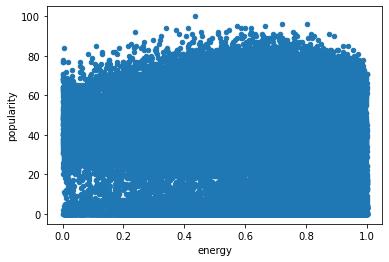

energy (-0.052816160986636274, 1.4465615512876798e-41)
energy SpearmanrResult(correlation=-0.0548598973179084, pvalue=1.0342639695620801e-44)


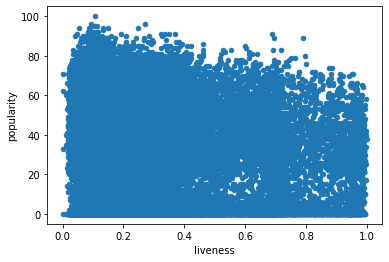

liveness (-0.12366393954423946, 7.694790797147955e-221)
liveness SpearmanrResult(correlation=-0.06976587217212596, pvalue=2.927574355456814e-71)


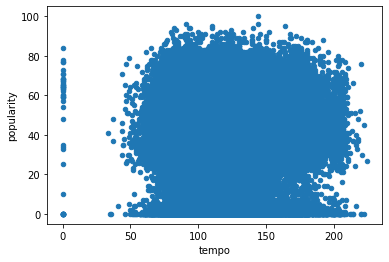

tempo (-0.03850282709404325, 7.391022519816153e-23)
tempo SpearmanrResult(correlation=-0.05098315599930578, pvalue=7.5964734095764e-39)


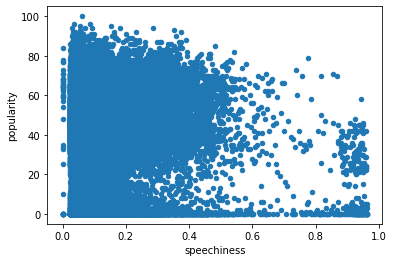

speechiness (0.0026670287793427554, 0.49554435610853614)
speechiness SpearmanrResult(correlation=-0.012357217205168379, pvalue=0.0015896094051852628)


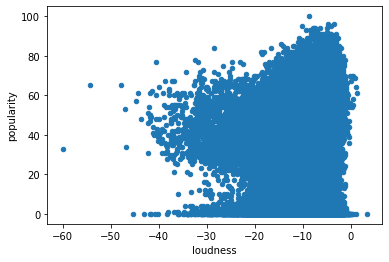

loudness (0.1277654962053031, 1.034594069091421e-235)
loudness SpearmanrResult(correlation=0.20644959518002037, pvalue=0.0)


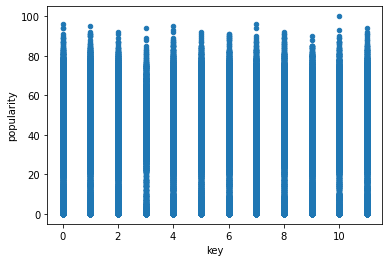

key (-0.016498754210884172, 2.483702304160075e-05)
key SpearmanrResult(correlation=-0.01591916536475294, pvalue=4.738952861862048e-05)


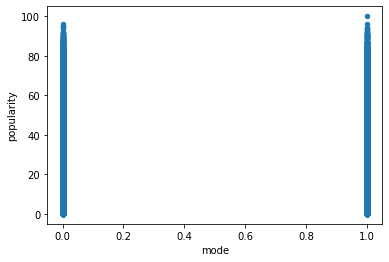

mode (0.02640251644986268, 1.4998952441874942e-11)
mode SpearmanrResult(correlation=0.01646837343433714, pvalue=2.5705939059280635e-05)


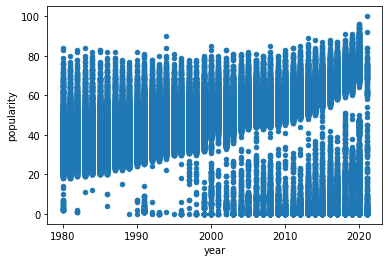

year (-0.14513002489907767, 3.0763626862171985e-304)
year SpearmanrResult(correlation=-0.024916112438289333, pvalue=1.9163844129802066e-10)


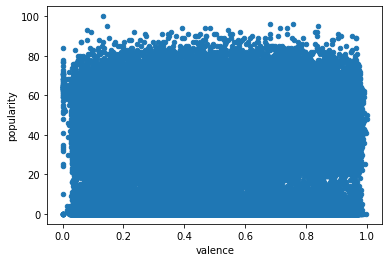

valence (0.08334614393009797, 5.388301053962575e-101)
valence SpearmanrResult(correlation=0.06529640084454334, pvalue=1.2409373203314835e-62)


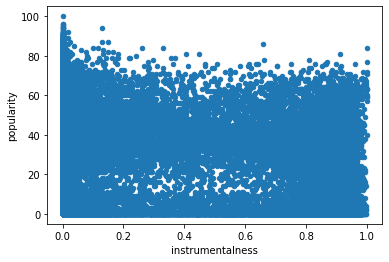

instrumentalness (-0.3560120546706304, 0.0)
instrumentalness SpearmanrResult(correlation=-0.359851724546611, pvalue=0.0)


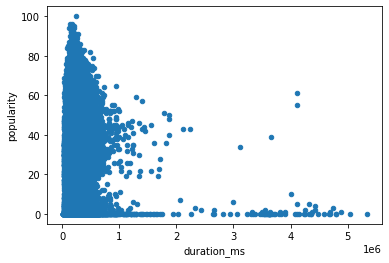

duration_ms (-0.09539414294337098, 7.789419098502553e-132)
duration_ms SpearmanrResult(correlation=-0.05285543064166288, pvalue=1.261866142991952e-41)


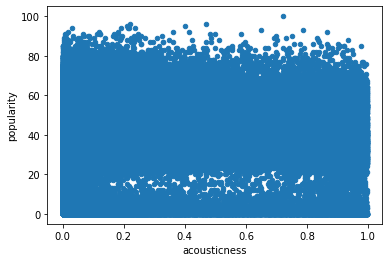

acousticness (0.024564752122289705, 3.428002377991466e-10)
acousticness SpearmanrResult(correlation=0.09128369843857481, pvalue=7.6985477243322275e-121)


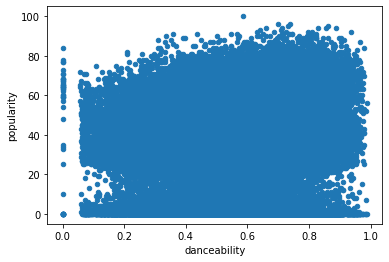

danceability (0.09395327983126325, 6.331774090855101e-128)
danceability SpearmanrResult(correlation=0.1043297053780961, pvalue=1.960383898894853e-157)


In [3]:
## Filter out all years less than 1980
df.drop(df.index[df['year'] < 1980], inplace=True)

## Plot all data against popularity and calculate pearson and spearman coefficients
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        df.plot.scatter(x=l[i], y='popularity')
        plt.show()
        print(l[i], stats.pearsonr(df[l[i]], df['popularity']))
        print(l[i], stats.spearmanr(df[l[i]], df['popularity']))

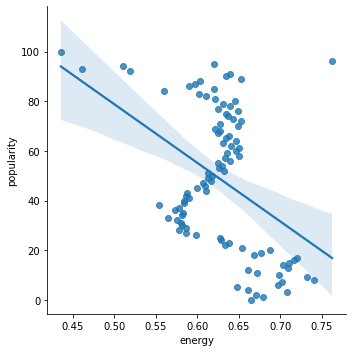

energy (-0.4344155201897221, 7.847003795680783e-06)
energy SpearmanrResult(correlation=-0.36765934114976817, pvalue=0.00019588246380522736)


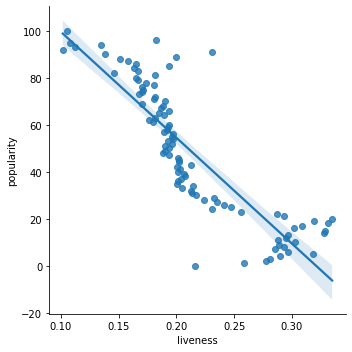

liveness (-0.8671383535547533, 8.124359351639556e-31)
liveness SpearmanrResult(correlation=-0.9118132726380148, pvalue=6.880356471859349e-39)


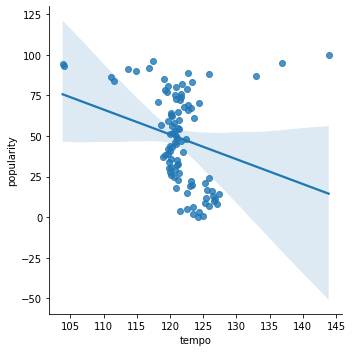

tempo (-0.26011909438286057, 0.009690040747031397)
tempo SpearmanrResult(correlation=-0.4051348749434169, pvalue=3.5026058198877364e-05)


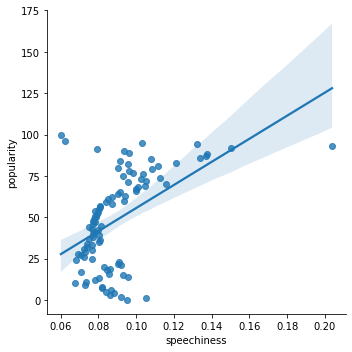

speechiness (0.4976732344054016, 1.851504485120718e-07)
speechiness SpearmanrResult(correlation=0.4809657696255634, pvalue=5.363655816076445e-07)


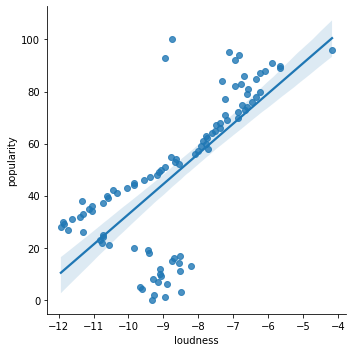

loudness (0.7097163075808939, 2.81945907219825e-16)
loudness SpearmanrResult(correlation=0.7279166586972182, pvalue=2.0442351310180274e-17)


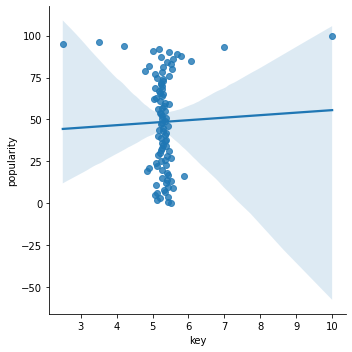

key (0.03404431046781409, 0.7392899463804475)
key SpearmanrResult(correlation=-0.06658017131214554, pvalue=0.5148033855718794)


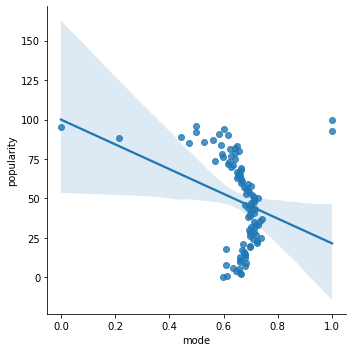

mode (-0.3029906711674514, 0.0024246210731238707)
mode SpearmanrResult(correlation=-0.39857059064362027, pvalue=4.807532749777778e-05)


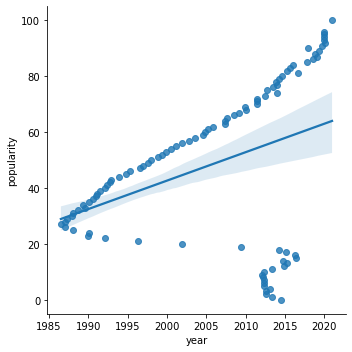

year (0.38732886558656215, 8.144161093204613e-05)
year SpearmanrResult(correlation=0.42574150132571426, pvalue=1.2402137177725726e-05)


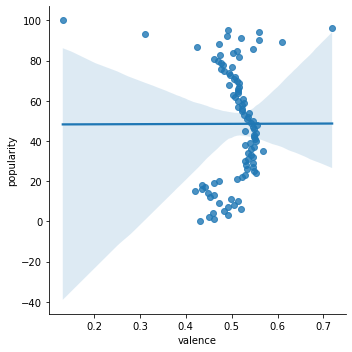

valence (0.001558652010591327, 0.9878471718109004)
valence SpearmanrResult(correlation=0.07712513308978698, pvalue=0.450351580985499)


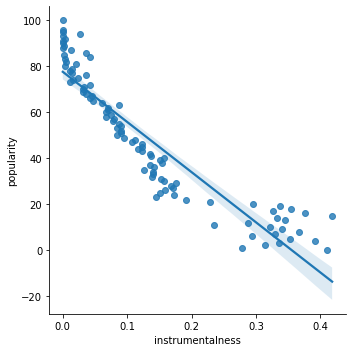

instrumentalness (-0.92611642062891, 1.9830686697222207e-42)
instrumentalness SpearmanrResult(correlation=-0.976907726539538, pvalue=3.7441786493238983e-66)


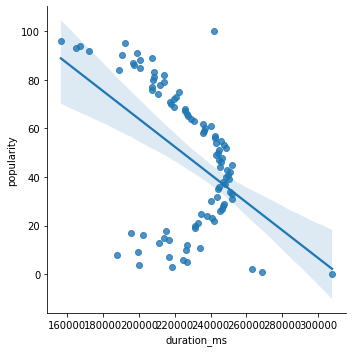

duration_ms (-0.4825580234528486, 4.85832886375726e-07)
duration_ms SpearmanrResult(correlation=-0.4289667132082448, pvalue=1.0476535232999168e-05)


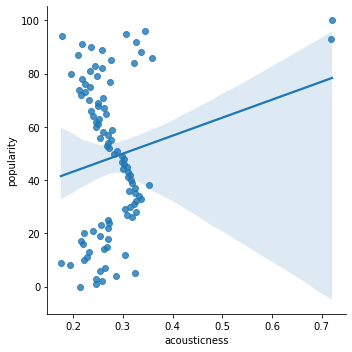

acousticness (0.18027356944283368, 0.07568297605421227)
acousticness SpearmanrResult(correlation=0.0005164202513245222, pvalue=0.9959733287545589)


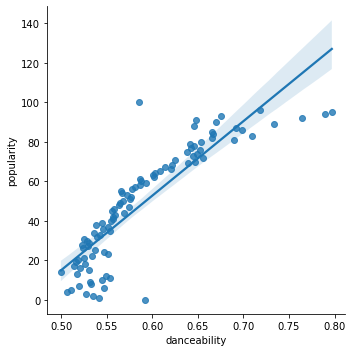

danceability (0.8735271056013276, 8.924594502946825e-32)
danceability SpearmanrResult(correlation=0.9144017494532957, pvalue=1.7521639128707332e-39)


In [4]:
## Determine coefficients based on average attribute over popularity
df1 = df.groupby('popularity')
df1 = df1.mean()
df1 = df1.reset_index()
l = ["energy", "liveness", "tempo", "speechiness","loudness","key","mode","year","valence","instrumentalness","duration_ms","acousticness", "danceability"]
for i in range(len(l)):
        # df1.plot.scatter(x=l[i], y='popularity')
        sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired")
        # sns.lmplot(x=l[i],y="popularity", data=df1, palette="Paired", order=2)
        plt.show()
        print(l[i], stats.pearsonr(df1[l[i]], df1['popularity']))
        print(l[i], stats.spearmanr(df1[l[i]], df1['popularity']))

## Machine Learning

### Importing New Packages

In [78]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import RocCurveDisplay

### Classification

### Start with fresh dataframe(s)

In [14]:
# df2 = pd.read_csv('cleaned_spotify.csv')
df3 = pd.read_csv('cleaned_spotify.csv')

In [4]:
## Popularity assessment begins with filtering for songs more recent than 1980 to avoid 0s
# df2.drop(df2.index[df2['year'] < 1980], inplace=True)
# df2.drop(df2.index[df2['popularity'] == 0], inplace=True)

df3.drop(df3.index[df3['year'] < 1980], inplace=True)

#### Establish training and testing sets

In [76]:
print("number of samples: " + str(len(df3)))

# X2 = df2[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness']]
# X12 = df2[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
# y2 = df2['popularity']
# X2_train, X2_test, y2_train, y2_test = train_test_split(X12,y2,test_size=0.2,random_state=0)

# X = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness']]
X1 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo']]
X2 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo', 'explicit', 'key', 'mode', 'year']]
X3 = df3[['loudness', 'energy', 'instrumentalness', 'acousticness', 'liveness', 'duration_ms', 'speechiness', 'valence', 'danceability', 'tempo', 'explicit', 'key', 'mode']]
y = df3['popularity']
mean = y.mean()
print("the mean is: " + str(mean))

age = []
for i in range(len(df3['year'])):
    age.append(2022 - df3['year'][i])
X3['age'] = age

X_train, X_test, y_train, y_test = train_test_split(X3,y,test_size=0.2,random_state=0)

## Classify data
y_bool_train = [i > mean for i in y_train]
for i in range(len(y_bool_train)):
    if y_bool_train[i]:
        y_bool_train[i] = 1
    else:
        y_bool_train[i] = 0

y_bool_test = [i > mean for i in y_test]
for i in range(len(y_bool_test)):
    if y_bool_test[i]:
        y_bool_test[i] = 1
    else:
        y_bool_test[i] = 0

print("number of popular samples: " + str(sum(y_bool_test) + sum(y_bool_train)))

number of samples: 137013
the mean is: 26.195623772926655
number of popular samples: 67775


/var/folders/q3/lybqkjzn4rd2_mh7vyk7_g9c0000gn/T/ipykernel_40532/1809322060.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3['age'] = age


#### Classification Models

In [43]:
#model1 = LogisticRegression(random_state = 0, solver = 'liblinear', class_weight = {'loudness' : 0.22, 'energy' : 0.2, 'instrumentalness' : 0.22, 'acousticness': 0.18, 'liveness': 0.2})
#model1 = LogisticRegression()
#params = {'C': [0.1, 1, 10]}
#grid = GridSearchCV(estimator = model1, param_grid = params)
#result = grid.fit(X_train, y_train)
#print("Best: %f using %s" % (result.best_score_, result.best_params_))

#classification

print('Logistic Regression')
model1 = LogisticRegression(solver='liblinear')
lrscores = cross_val_score(model1, X_train, y_bool_train, scoring='f1', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model1.fit(X_train, y_bool_train)
pred = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()
print('Decision Tree Classifier')
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
dtscores = cross_val_score(model2, X_train, y_bool_train, scoring='f1', cv=5)
print(dtscores)
print('avg cv score: ' + str(sum(dtscores)/len(dtscores)))
model2.fit(X_train, y_bool_train)
pred = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()
print('K Nearest Neighbor Classifier')
model3 = KNeighborsClassifier()
knnscores = cross_val_score(model3, X_train, y_bool_train, scoring='f1', cv=5)
print(knnscores)
print('avg cv score: ' + str(sum(knnscores)/len(knnscores)))
model3.fit(X_train, y_bool_train)
pred = model3.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()
print('Voting Classifier with Decision Tree')
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
v = []
for i in range(11):
    v.append(('DTC'+str(i), classifier))
model4 = VotingClassifier(estimators=v, voting ='hard')
vcscores = cross_val_score(model4, X_train, y_bool_train, scoring='f1', cv=5)
print(vcscores)
print('avg cv score: ' + str(sum(vcscores)/len(vcscores)))
model4.fit(X_train, y_bool_train)
pred = model4.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()
print('Bagging Classifier with Decision Tree')
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
model5 = BaggingClassifier(base_estimator=classifier)
bcscores = cross_val_score(model5, X_train, y_bool_train, scoring='f1', cv=5)
print(bcscores)
print('avg cv score: ' + str(sum(bcscores)/len(bcscores)))
model5.fit(X_train, y_bool_train)
pred = model5.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()
print('Voting Classifier with Decision Tree and KNN')
classifier = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
v = []
for i in range(5):
    v.append(('DTC'+str(i), classifier))
classifier = KNeighborsClassifier()
v = []
for i in range(5):
    v.append(('KNN'+str(i), classifier))
model6 = VotingClassifier(estimators=v, voting ='hard')
vc2scores = cross_val_score(model6, X_train, y_bool_train, scoring='f1', cv=5)
print(vc2scores)
print('avg cv score: ' + str(sum(vc2scores)/len(vc2scores)))
model6.fit(X_train, y_bool_train)
pred = model6.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

rfc = RandomForestClassifier()
etc = ExtraTreesClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
hgbc = HistGradientBoostingClassifier()
rfcscores = cross_val_score(rfc, X_train, y_bool_train, scoring='f1', cv=5)
etcscores = cross_val_score(etc, X_train, y_bool_train, scoring='f1', cv=5)
abcscores = cross_val_score(abc, X_train, y_bool_train, scoring='f1', cv=5)
gbcscores = cross_val_score(gbc, X_train, y_bool_train, scoring='f1', cv=5)
hgbcscores = cross_val_score(hgbc, X_train, y_bool_train, scoring='f1', cv=5)
print("scores for RandomForestClassifier: " + str(rfcscores) + ",\n   avg: " + str(sum(rfcscores)/len(rfcscores)))
print("scores for ExtraTreesClassifier: " + str(etcscores) + ",\n   avg: " + str(sum(etcscores)/len(etcscores)))
print("scores for AdaBoostClassifier: " + str(abcscores) + ",\n   avg: " + str(sum(abcscores)/len(abcscores)))
print("scores for GradientBoostingClassifier: " + str(gbcscores) + ",\n   avg: " + str(sum(gbcscores)/len(gbcscores)))
print("scores for HistGradientBoostingClassifier: " + str(hgbcscores) + ",\n   avg: " + str(sum(hgbcscores)/len(hgbcscores)))

Logistic Regression
[0.72397139 0.72493645 0.71969276 0.72202999 0.72044558]
avg cv score: 0.7222152340830152
score on test data: 0.7216053709100297

Decision Tree Classifier
[0.85584178 0.85711737 0.85783762 0.85574398 0.85533244]
avg cv score: 0.8563746369276917
score on test data: 0.8627464863525329

K Nearest Neighbor Classifier
[0.73234005 0.73465633 0.73014626 0.73097337 0.73055788]
avg cv score: 0.7317347772694649
score on test data: 0.7461193874361913

Voting Classifier with Decision Tree
[0.85590495 0.85730853 0.85772175 0.85578207 0.85520443]
avg cv score: 0.8563843454893691
score on test data: 0.862767313411698

Bagging Classifier with Decision Tree
[0.86804692 0.86697534 0.86616635 0.8648215  0.86459494]
avg cv score: 0.8661210101985072
score on test data: 0.8717966919855186

Voting Classifier with Decision Tree and KNN
[0.73234005 0.73465633 0.73014626 0.73097337 0.73055788]
avg cv score: 0.7317347772694649
score on test data: 0.7461193874361913
scores for RandomForestClas

In [45]:
print('Voting Classifier with Random Forest')
classifier = RandomForestClassifier()
v = []
for i in range(11):
    v.append(('RFC'+str(i), classifier))
model7 = VotingClassifier(estimators=v, voting ='hard')
vc3scores = cross_val_score(model7, X_train, y_bool_train, scoring='f1', cv=5)
print(vc3scores)
print('avg cv score: ' + str(sum(vc3scores)/len(vc3scores)))
model7.fit(X_train, y_bool_train)
pred = model7.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

print()
print('Bagging Classifier with Random Forest')
classifier = RandomForestClassifier()
model8 = BaggingClassifier(base_estimator=classifier)
bc2scores = cross_val_score(model8, X_train, y_bool_train, scoring='f1', cv=5)
print(bc2scores)
print('avg cv score: ' + str(sum(bc2scores)/len(bc2scores)))
model8.fit(X_train, y_bool_train)
pred = model8.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred)))

Voting Classifier with Random Forest
[0.87231409 0.87413175 0.87329193 0.8712924  0.87137481]
avg cv score: 0.8724809933331958
score on test data: 0.8780933633295837

Bagging Classifier with Random Forest
[0.87194397 0.87374449 0.87288173 0.86972655 0.87079271]
avg cv score: 0.8718178915803829
score on test data: 0.8764367816091955


In [92]:
print('Logistic Regression')
model1 = LogisticRegression(solver='liblinear')
model1.fit(X_train, y_bool_train)
pred1 = model1.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred1)))

print()
print('Decision Tree Classifier')
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11, min_samples_leaf=12)
model2.fit(X_train, y_bool_train)
pred2 = model2.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred2)))

print()
print('K Nearest Neighbor Classifier')
model3 = KNeighborsClassifier()
model3.fit(X_train, y_bool_train)
pred3 = model3.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred3)))

print()
print('Gradient Boosting Classifier')
model4 = GradientBoostingClassifier()
model4.fit(X_train, y_bool_train)
pred4 = model4.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred4)))

print()
print('Random Forest Classifier')
model5 = RandomForestClassifier()
model5.fit(X_train, y_bool_train)
pred5 = model5.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred5)))

print()
print('Voting Classifier')
classifier = RandomForestClassifier()
v = []
for i in range(11):
    v.append(('RFC'+str(i), classifier))
model6 = VotingClassifier(estimators=v, voting ='soft')
model6.fit(X_train, y_bool_train)
pred6 = model6.predict(X_test)
print('score on test data: ' + str(f1_score(y_bool_test, pred6)))

Logistic Regression
score on test data: 0.7216053709100297

Decision Tree Classifier
score on test data: 0.8626965019119105

K Nearest Neighbor Classifier
score on test data: 0.7461193874361913

Gradient Boosting Classifier
score on test data: 0.8690948684626463

Random Forest Classifier
score on test data: 0.8763404943567386

Voting Classifier
score on test data: 0.8776705841080511


/Users/caxi.w/.local/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


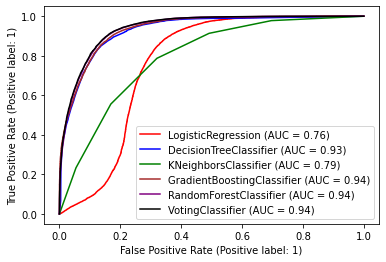

In [105]:
m1_disp = RocCurveDisplay.from_estimator(model1, X_test, y_bool_test, color='red')
ax = plt.gca()
m2_disp = RocCurveDisplay.from_estimator(model2, X_test, y_bool_test, color='blue', ax=ax)
m3_disp = RocCurveDisplay.from_estimator(model3, X_test, y_bool_test, color='green', ax=ax)
m4_disp = RocCurveDisplay.from_estimator(model4, X_test, y_bool_test, color='brown', ax=ax)
m5_disp = RocCurveDisplay.from_estimator(model5, X_test, y_bool_test, color='purple', ax=ax)
m6_disp = RocCurveDisplay.from_estimator(model6, X_test, y_bool_test, color='black', ax=ax)

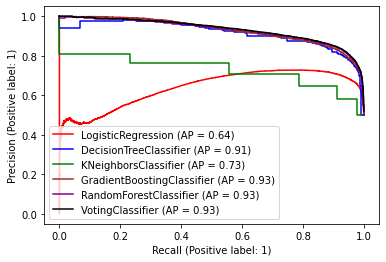

wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error resolved after 0:00:07.853827, resuming normal operation.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error resolved after 0:00:08.155941, resuming normal operation.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error resolved after 0:00:07.961896, resuming normal operation.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error resolved after 0:00:08.652517, resuming normal operation.
wandb: Networ

In [112]:
from sklearn.metrics import PrecisionRecallDisplay
m1_disp = PrecisionRecallDisplay.from_estimator(model1, X_test, y_bool_test, color='red')
ax = plt.gca()
m2_disp = PrecisionRecallDisplay.from_estimator(model2, X_test, y_bool_test, color='blue', ax=ax)
m3_disp = PrecisionRecallDisplay.from_estimator(model3, X_test, y_bool_test, color='green', ax=ax)
m4_disp = PrecisionRecallDisplay.from_estimator(model4, X_test, y_bool_test, color='brown', ax=ax)
m5_disp = PrecisionRecallDisplay.from_estimator(model5, X_test, y_bool_test, color='purple', ax=ax)
m6_disp = PrecisionRecallDisplay.from_estimator(model6, X_test, y_bool_test, color='black', ax=ax)

### Regression

#### Regression Models

In [46]:
#param_grid = {'max_depth': [5, 7, 9, 11], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05]}
#estimator = GradientBoostingRegressor()
#gs = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='r2')
#result = gs.fit(X2_train, y2_train)
#print("Best: %f using %s" % (result.best_score_, result.best_params_))

print('Gradient Boosting Regressor')
model4 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
gbscores = cross_val_score(model4, X_train, y_train, scoring='r2', cv=5)
print(gbscores)
print('avg cv score: ' + str(sum(gbscores)/len(gbscores)))
model4.fit(X_train, y_train)
pred = model4.predict(X_test)
print('score on test data: ' + str(r2_score(y_test, pred)))

print()

print('Linear Regression')
model5 = LinearRegression()
lrscores = cross_val_score(model5, X_train, y_train, scoring='r2', cv=5)
print(lrscores)
print('avg cv score: ' + str(sum(lrscores)/len(lrscores)))
model5.fit(X_train, y_train)
pred = model5.predict(X_test)
print('score on test data: ' + str(r2_score(y_test, pred)))



Gradient Boosting Regressor
[0.68273395 0.68014271 0.67919038 0.68262804 0.68049323]
avg cv score: 0.6810376599918493
score on test data: 0.6899783097745567

Linear Regression
[0.40425744 0.41197506 0.40054922 0.40508852 0.40887327]
avg cv score: 0.40614870447966994
score on test data: 0.4124431375795724


#### Tuning Gradient Boosting Regressor

In [11]:
model6 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
for k in [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]:
    w = []
    for _, val in y_train.iteritems():
        if val == 0:
            w.append(k)
        else:
            w.append(1)
    model6.fit(X_train, y_train, w)
    pred = model6.predict(X_test)
    print('score on test data: ' + str(r2_score(y_test, pred)))
    print('')

score on test data: 0.2849003622197911

score on test data: 0.29747760790436306

score on test data: 0.30453946901644013

score on test data: 0.3135929228210106

score on test data: 0.32033326121068406

score on test data: 0.3245178923140434

score on test data: 0.3290771116507739

score on test data: 0.3330043280366619

score on test data: 0.33122256794285054

score on test data: 0.3319835786212154



#### Determining relative ranking for accuracy rather than exact score

In [47]:
model7 = GradientBoostingRegressor(learning_rate=0.05, max_depth=9)
model7.fit(X_train, y_train)
pred = model7.predict(X_test)
rank_pred = stats.rankdata(pred, method='min')
rank_true = stats.rankdata(y_test, method='min')
true = 0
total = 0
for i in range(len(rank_pred)):
    for j in range(i+1, len(rank_pred)):
        if rank_pred[i] <= rank_pred[j] and rank_true[i] <= rank_true[j]:
            true += 1
            total += 1
        elif rank_pred[i] > rank_pred[j] and rank_true[i] > rank_true[j]:
            true += 1
            total += 1
        else:
            total += 1
prec = true / total
print("pairwise ranking accuracy: " + str(prec))

pairwise ranking accuracy: 0.8190233961327048
